In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import scipy
import argparse
import copy

In [2]:
def plot_weights(args):
    stim_conts, fb_conts, all_conts = belief_partitions_io.get_contributions_for_all_time(args, region_level="structure_level2")
    peaks, orders = spike_utils.find_peaks(all_conts, value_col="mean_cont", time_col="abs_time", region_level="structure_level2")
    _, _ = visualization_utils.plot_pop_heatmap_by_time(stim_conts, fb_conts, all_conts, value_col="mean_cont", region_level="structure_level2", orders=orders)

In [3]:
sig_unit_level = "all_filter_drift"


## HC

In [4]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.shuffle_method = "session_permute"
args.sig_unit_level = sig_unit_level
args.subject = "both"
args.region_level = "structure_level2_cleaned"
args.regions = "medial_pallium_MPal"
args.base_output_path = "/data/patrick_res/choice_reward"

Warning, shuffle not found: YELLOW_choice_shuffle_2
Warning, shuffle not found: YELLOW_choice_shuffle_3
Warning, shuffle not found: YELLOW_choice_shuffle_4
Warning, shuffle not found: YELLOW_choice_shuffle_6
Warning, shuffle not found: YELLOW_choice_shuffle_7
Warning, shuffle not found: YELLOW_choice_shuffle_9
Warning, shuffle not found: YELLOW_choice_shuffle_2
Warning, shuffle not found: YELLOW_choice_shuffle_3
Warning, shuffle not found: YELLOW_choice_shuffle_4
Warning, shuffle not found: YELLOW_choice_shuffle_6
Warning, shuffle not found: YELLOW_choice_shuffle_7
Warning, shuffle not found: YELLOW_choice_shuffle_9


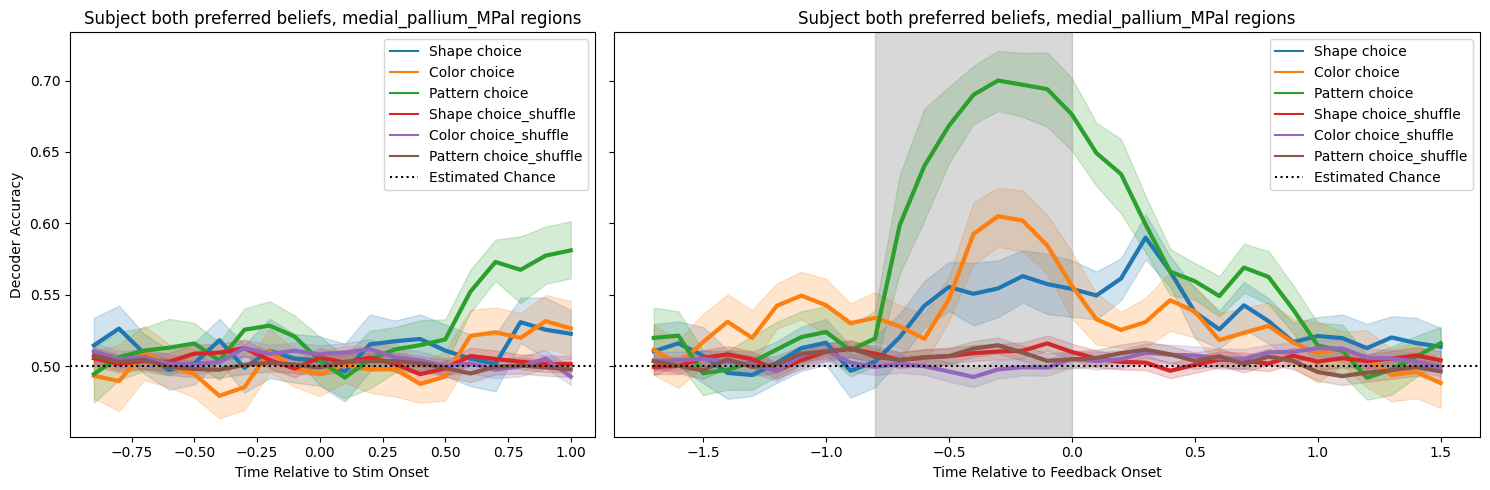

In [5]:
args.mode = "choice"
visualization_utils.plot_combined_accs(args, by_dim=True)



## ITC

In [18]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.shuffle_method = "session_permute"
args.sig_unit_level = sig_unit_level
args.subject = "both"
args.region_level = "structure_level2_cleaned"
args.regions = "inferior_temporal_cortex_ITC"
args.base_output_path = "/data/patrick_res/choice_reward"

Warning, shuffle not found: YELLOW_reward_shuffle_2
Warning, shuffle not found: YELLOW_reward_shuffle_3
Warning, shuffle not found: YELLOW_reward_shuffle_4
Warning, shuffle not found: YELLOW_reward_shuffle_6
Warning, shuffle not found: YELLOW_reward_shuffle_7
Warning, shuffle not found: YELLOW_reward_shuffle_9
Warning, shuffle not found: YELLOW_reward_shuffle_2
Warning, shuffle not found: YELLOW_reward_shuffle_3
Warning, shuffle not found: YELLOW_reward_shuffle_4
Warning, shuffle not found: YELLOW_reward_shuffle_6
Warning, shuffle not found: YELLOW_reward_shuffle_7
Warning, shuffle not found: YELLOW_reward_shuffle_9


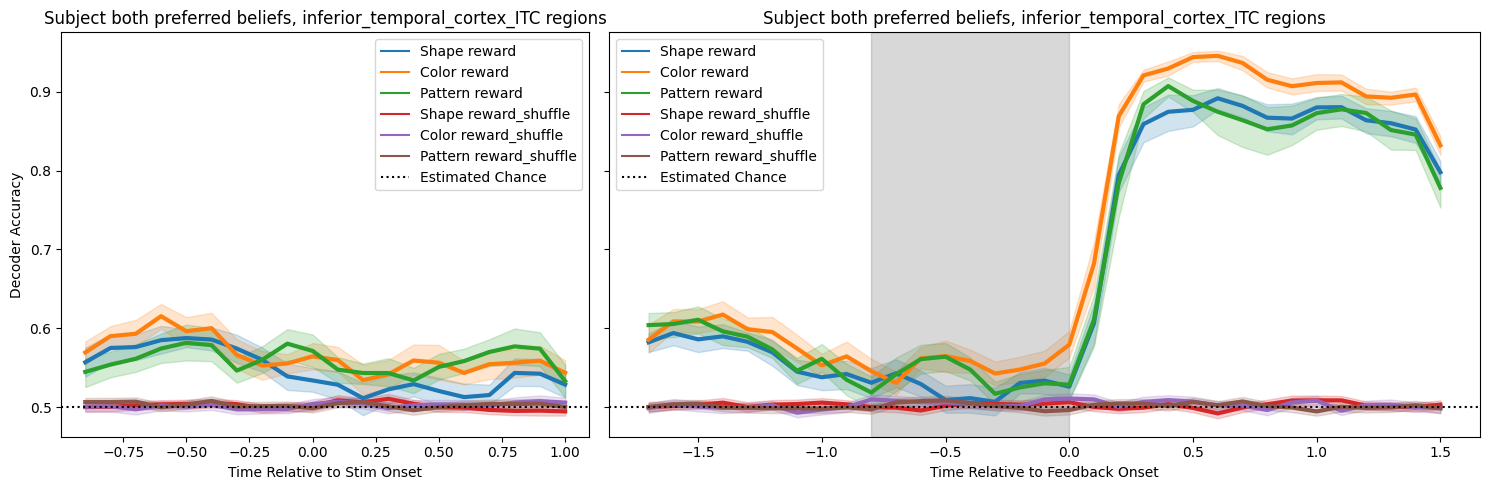

In [21]:
args.mode = "reward"
visualization_utils.plot_combined_accs(args, by_dim=True)


## Combining regions

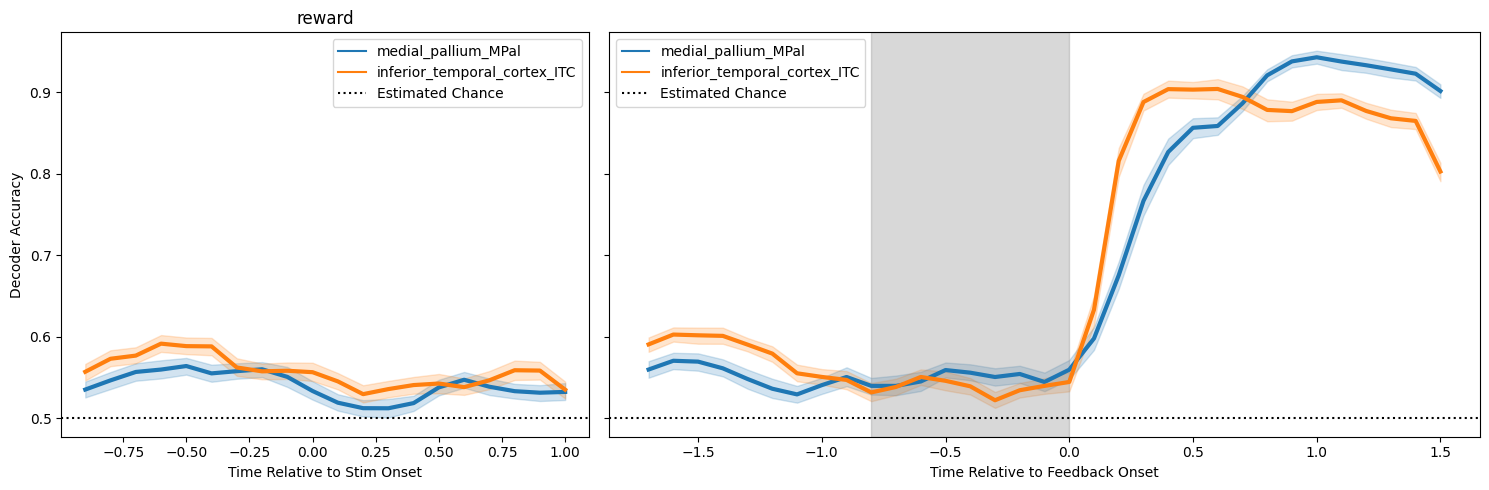

In [23]:
regions = ["medial_pallium_MPal", "inferior_temporal_cortex_ITC"]

args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.shuffle_method = "session_permute"
args.mode = "reward"
args.sig_unit_level = sig_unit_level
args.region_level="structure_level2_cleaned"
args.subject = "both"
args.base_output_path = "/data/patrick_res/choice_reward"

visualization_utils.plot_combined_accs_by_attr(args, attr="regions", values=regions)

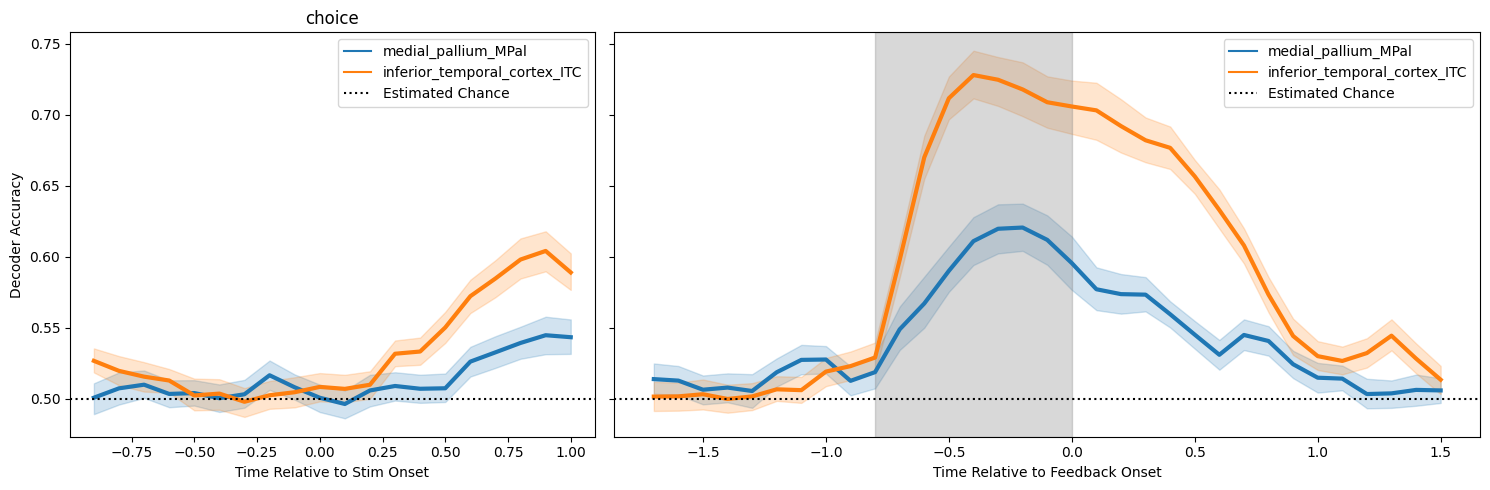

In [24]:
regions = ["medial_pallium_MPal", "inferior_temporal_cortex_ITC"]

args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.shuffle_method = "session_permute"
args.mode = "choice"
args.sig_unit_level = sig_unit_level
args.region_level="structure_level2_cleaned"
args.subject = "both"
args.base_output_path = "/data/patrick_res/choice_reward"

visualization_utils.plot_combined_accs_by_attr(args, attr="regions", values=regions)